In [20]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
from typing import List
from utils import dref_dataframe

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1)
sns.set_palette("colorblind")

path = Path("filling/latest")


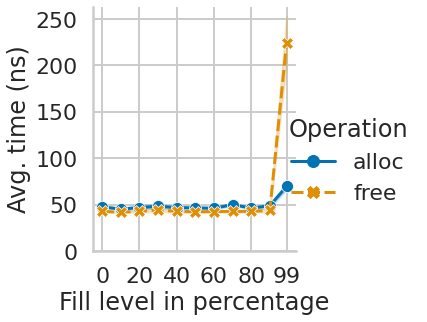

In [21]:
data = pd.read_csv(path / "out.csv")
del data["alloc"]
data.rename(columns={"get_avg": "alloc", "put_avg": "free"}, inplace=True)
data = data[["x", "alloc", "free"]]
pgd = data.melt(
    id_vars=["x"], value_vars=["alloc", "free"],
    var_name="op", value_name="time")

with sns.plotting_context("poster"):
    g = sns.relplot(data=pgd, kind="line", x="x", y="time",
                    hue="op", style="op", markers=True, legend=True)
    g.set(ylim=(0, None))
    g.set(xticks=[x * 20 for x in range(5)] + [99])
    g.legend.set_title("Operation")
    g.set(ylabel="Avg. time (ns)")
    g.set(xlabel="Fill level in percentage")
    g.savefig("out/filling.pdf")

dref_dataframe("filling", Path("out"), ["x", "op"], pgd)
